In [1]:
import sys
import numpy
import matplotlib
import pandas
import sklearn

print('Python : {}', format(sys.version))
print('numpy : {}', format(numpy.__version__))
print('matplotlib : {}', format(matplotlib.__version__))
print('pandas : {}', format(pandas.__version__))
print('sklearn : {}', format(sklearn.__version__))

Python : {} 3.8.3 (tags/v3.8.3:6f8c832, May 13 2020, 22:37:02) [MSC v.1924 64 bit (AMD64)]
numpy : {} 1.19.1
matplotlib : {} 3.3.0
pandas : {} 1.0.5
sklearn : {} 0.23.1


In [29]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC #support vector classifier
from sklearn import model_selection #it imports cross_validation as well

#Adding extra things(Note: We don't need to import them, we can access then via model_seleection)
#from sklearn.model_selection import cross_validate
#from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
        'marginal_adhesion', 'single_epithelial_size', 'bare_nuclie', 'bland_chromatin',
        'normal_nuclulie', 'mitoses', 'class']
df = pd.read_csv(url, names = names)

In [7]:
#Preprocess the data
df.replace('?', -9999, inplace=True)
print(df.axes)
#As we don't need to perform ml on id, we should drop it
df.drop(['id'], 1, inplace=True)
#Print the shape(Order of the mat)
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclie',
       'bland_chromatin', 'normal_nuclulie', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [9]:
#Visualization
print(df.loc[0]) #First cell in the data set
print(df.describe) #info of mean,etc..

clump_thickness           5
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
single_epithelial_size    2
bare_nuclie               1
bland_chromatin           3
normal_nuclulie           1
mitoses                   1
class                     2
Name: 0, dtype: object
<bound method NDFrame.describe of      clump_thickness  uniform_cell_size  uniform_cell_shape  \
0                  5                  1                   1   
1                  5                  4                   4   
2                  3                  1                   1   
3                  6                  8                   8   
4                  4                  1                   1   
..               ...                ...                 ...   
694                3                  1                   1   
695                2                  1                   1   
696                5                 10                  10   
697                4             

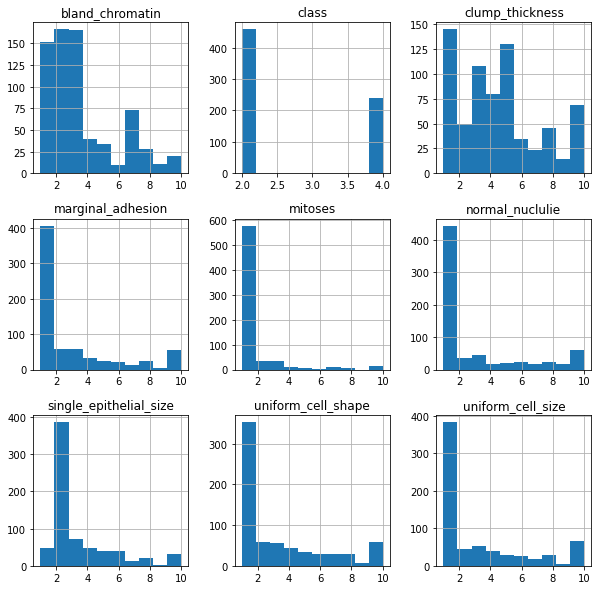

In [12]:
#Plot histogram for each variable
df.hist(figsize = (10, 10))
plt.show()

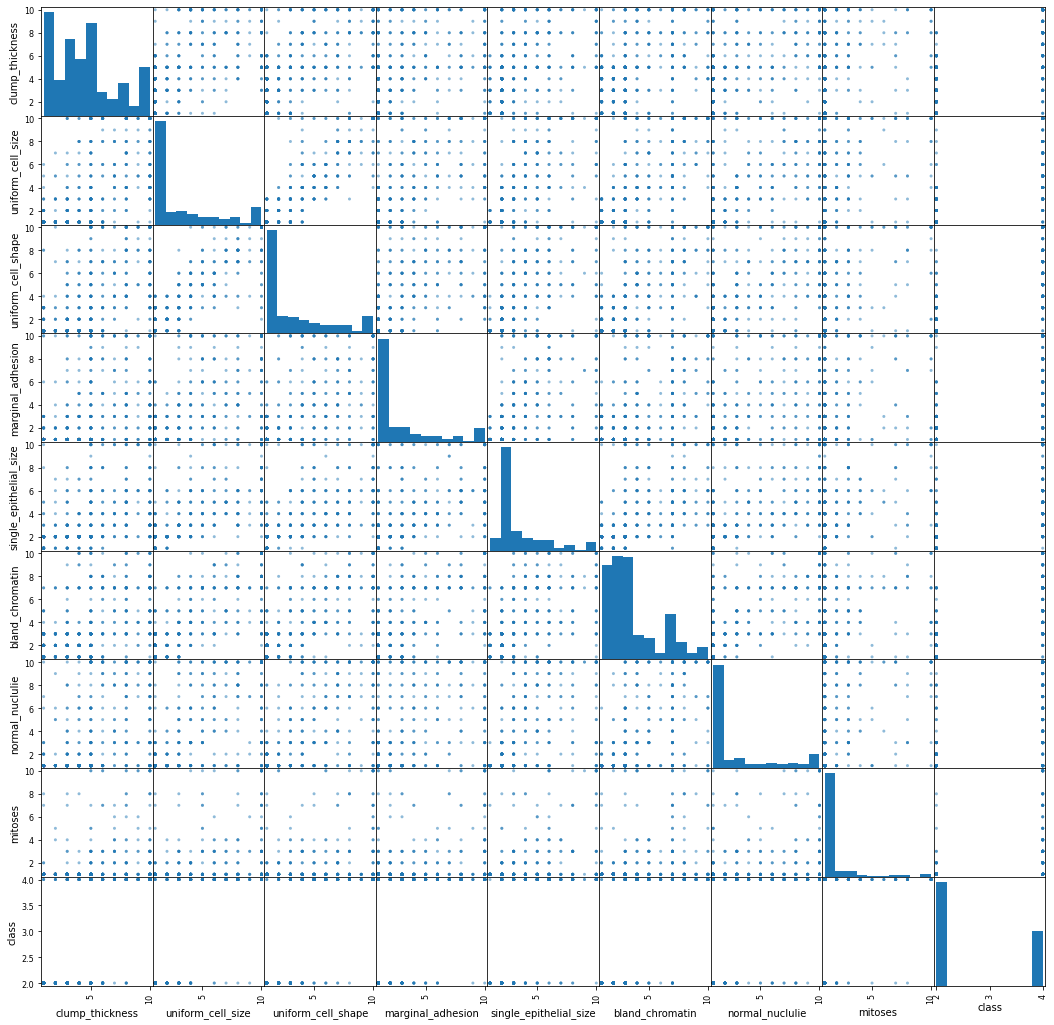

In [13]:
#Create scatter plot matrix
#It will hepls us to tell whether a linear algo will help us or not
scatter_matrix(df, figsize=(18,18))
plt.show()

In [30]:
#Create X and y datasets for training
X = np.array(df.drop(['class'], 1))#Dropping the class
y = np.array(df['class']) #Cnosidering only the class
#Create the test size to check the hypothesis
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2) #We don't need to access this via cross_validate as we have imported thsi independently

In [27]:
# Specify the testing options
seed = 0
scoring = 'accuracy'

In [44]:
# Choosing the best model for model selection(Only testing on test sets)
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5))) #Choosing KNN
models.append(('SVM', SVC())) #Choosing SVM
#Evaluate each model
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = seed) #Run KFold 10 times
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" % (name, cv_results.mean(), cv_results.std()) #Mean and standard deviation
    print(msg)

c:\users\amand\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
c:\users\amand\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNN : 0.964188 (0.016083)
SVM : 0.658182 (0.051853)


In [46]:
# Make predictions on validation datasets

for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9714285714285714
              precision    recall  f1-score   support

           2       0.98      0.98      0.98        90
           4       0.96      0.96      0.96        50

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

SVM
0.6428571428571429
              precision    recall  f1-score   support

           2       0.64      1.00      0.78        90
           4       0.00      0.00      0.00        50

    accuracy                           0.64       140
   macro avg       0.32      0.50      0.39       140
weighted avg       0.41      0.64      0.50       140



c:\users\amand\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
